In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


pd.options.display.max_rows = 500
pd.options.display.max_columns = 100
%matplotlib inline

### Import data

In [3]:
train = pd.read_csv("lab04data/lab04_train.csv")
print(train.shape)
train.head()

(320764, 117)


,Unnamed: 0,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,PRC_ACCEPTS_A_AMOBILE,SUM_TRAN_AUT_TENDENCY3M,CLNT_TRUST_RELATION,PRC_ACCEPTS_TK,PRC_ACCEPTS_A_MTP,REST_DYNAMIC_FDEP_1M,CNT_TRAN_AUT_TENDENCY3M,CNT_ACCEPTS_TK,APP_MARITAL_STATUS,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CNT_TRAN_MED_TENDENCY1M,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,AMOUNT_RUB_NAS_PRC,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,TRANS_COUNT_SUP_PRC,APP_EDUCATION,CNT_TRAN_CLO_TENDENCY1M,SUM_TRAN_MED_TENDENCY1M,PRC_ACCEPTS_A_ATM,PRC_ACCEPTS_MTP,TRANS_COUNT_NAS_PRC,APP_TRAVEL_PASS,CNT_ACCEPTS_MTP,CR_PROD_CNT_TOVR,APP_CAR,CR_PROD_CNT_PIL,SUM_TRAN_CLO_TENDENCY1M,APP_POSITION_TYPE,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CNT_TRAN_MED_TENDENCY3M,...,APP_COMP_TYPE,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,CNT_TRAN_SUP_TENDENCY3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,SUM_TRAN_SUP_TENDENCY3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,CNT_TRAN_ATM_TENDENCY1M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,DEAL_GRACE_DAYS_ACC_S1X1,AVG_PCT_MONTH_TO_PCLOSE,DEAL_YWZ_IR_MIN,SUM_TRAN_SUP_TENDENCY1M,DEAL_YWZ_IR_MAX,SUM_TRAN_ATM_TENDENCY1M,REST_DYNAMIC_PAYM_1M,CNT_TRAN_SUP_TENDENCY1M,DEAL_GRACE_DAYS_ACC_AVG,TURNOVER_DYNAMIC_CUR_3M,PACK,MAX_PCLOSE_DATE,LDEAL_YQZ_PC,CLNT_SETUP_TENOR,DEAL_GRACE_DAYS_ACC_MAX,TURNOVER_DYNAMIC_PAYM_3M,LDEAL_DELINQ_PER_MAXYQZ,TURNOVER_DYNAMIC_PAYM_1M,CLNT_SALARY_VALUE,TRANS_AMOUNT_TENDENCY3M,MED_DEBT_PRC_YQZ,TRANS_CNT_TENDENCY3M,LDEAL_USED_AMT_AVG_YQZ,REST_DYNAMIC_CC_1M,LDEAL_USED_AMT_AVG_YWZ,TURNOVER_DYNAMIC_CC_1M,AVG_PCT_DEBT_TO_DEAL_AMT,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,333149,479990,0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.000000,0.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,19069.691717,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,0.0,0.000000,NaN,0.0,1.0,NaN,0.0,NaN,NaN,0.0,0.981818,0.926472,0.0,324.0,NaN,...,NaN,0.0,0.244042,NaN,0.144300,0.0,NaN,0.0,0.351852,0.166667,0.0,0.329321,0.0,NaN,45.0,NaN,45.0,0.167901,0.0,NaN,0.0,0.303750,102,NaN,NaN,5.480001,0.0,0.0,NaN,0.0,NaN,0.305106,NaN,0.345455,NaN,0.0,1.0,0.0,NaN,0.003524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,303639,450480,0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.027168,0.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,5951.208683,NaN,NaN,NaN,0.048746,офис-менеджер,NaN,0.030303,NaN,NaN,NaN,0.0,0.0,0.030303,NaN,0.0,1.0,NaN,0.0,NaN,NaN,0.0,0.090909,0.292473,0.0,360.0,NaN,...,NaN,0.0,0.465244,1.000,0.203484,0.0,1.000000,0.0,0.333333,0.333333,0.0,0.333333,0.0,NaN,45.0,NaN,45.0,0.333333,0.0,NaN,0.0,0.504160,102,NaN,NaN,6.786453,0.0,0.0,NaN,0.0,NaN,0.368799,NaN,0.454545,NaN,0.0,1.0,0.0,NaN,0.000618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,327113,473954,0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.114951,0.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,3774.582933,0.25,NaN,NaN,0.004519,консультант,NaN,0.363636,NaN,NaN,0.279487,0.0,0.0,0.136364,NaN,0.0,1.0,NaN,0.0,NaN,NaN,0.0,0.136364,0.533251,0.0,600.0,1.0,...,NaN,0.0,0.490018,0.375,0.090256,0.0,0.317348,0.0,NaN,NaN,0.0,NaN,0.0,NaN,45.0,NaN,45.0,NaN,0.0,NaN,0.0,0.351398,102,NaN,NaN,8.528388,0.0,0.0,NaN,0.0,NaN,0.358522,NaN,0.318182,NaN,0.0,1.0,0.0,NaN,0.027484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,384197,531038,0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,148568.263850,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.666667,0.761035,0.0,732.0,NaN,...,NaN,0.0,0.497541,NaN,0.000000,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.000000,K01,NaN,NaN,3.291829,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0

In [4]:
test = pd.read_csv("lab04data/lab04_test.csv")
print(test.shape)
test.head()

(44399, 116)


,Unnamed: 0,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,PRC_ACCEPTS_A_AMOBILE,SUM_TRAN_AUT_TENDENCY3M,CLNT_TRUST_RELATION,PRC_ACCEPTS_TK,PRC_ACCEPTS_A_MTP,REST_DYNAMIC_FDEP_1M,CNT_TRAN_AUT_TENDENCY3M,CNT_ACCEPTS_TK,APP_MARITAL_STATUS,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CNT_TRAN_MED_TENDENCY1M,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,AMOUNT_RUB_NAS_PRC,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,TRANS_COUNT_SUP_PRC,APP_EDUCATION,CNT_TRAN_CLO_TENDENCY1M,SUM_TRAN_MED_TENDENCY1M,PRC_ACCEPTS_A_ATM,PRC_ACCEPTS_MTP,TRANS_COUNT_NAS_PRC,APP_TRAVEL_PASS,CNT_ACCEPTS_MTP,CR_PROD_CNT_TOVR,APP_CAR,CR_PROD_CNT_PIL,SUM_TRAN_CLO_TENDENCY1M,APP_POSITION_TYPE,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CNT_TRAN_MED_TENDENCY3M,...,LDEAL_AMT_MONTH,APP_COMP_TYPE,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,CNT_TRAN_SUP_TENDENCY3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,SUM_TRAN_SUP_TENDENCY3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,CNT_TRAN_ATM_TENDENCY1M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,DEAL_GRACE_DAYS_ACC_S1X1,AVG_PCT_MONTH_TO_PCLOSE,DEAL_YWZ_IR_MIN,SUM_TRAN_SUP_TENDENCY1M,DEAL_YWZ_IR_MAX,SUM_TRAN_ATM_TENDENCY1M,REST_DYNAMIC_PAYM_1M,CNT_TRAN_SUP_TENDENCY1M,DEAL_GRACE_DAYS_ACC_AVG,TURNOVER_DYNAMIC_CUR_3M,PACK,MAX_PCLOSE_DATE,LDEAL_YQZ_PC,CLNT_SETUP_TENOR,DEAL_GRACE_DAYS_ACC_MAX,TURNOVER_DYNAMIC_PAYM_3M,LDEAL_DELINQ_PER_MAXYQZ,TURNOVER_DYNAMIC_PAYM_1M,CLNT_SALARY_VALUE,TRANS_AMOUNT_TENDENCY3M,MED_DEBT_PRC_YQZ,TRANS_CNT_TENDENCY3M,LDEAL_USED_AMT_AVG_YQZ,REST_DYNAMIC_CC_1M,LDEAL_USED_AMT_AVG_YWZ,TURNOVER_DYNAMIC_CC_1M,AVG_PCT_DEBT_TO_DEAL_AMT,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR
0,372289,519130,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,0,13916.819100,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0,NaN,0,NaN,NaN,0.0,1.000000,1.000000,0.000,240,NaN,...,NaN,NaN,0.0,1.000000,NaN,0.640112,0.000000,NaN,0.0,1.000000,NaN,0.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,K01,NaN,NaN,0.571399,NaN,0.000000,NaN,0.000000,NaN,1.000000,NaN,1.000000,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,87204,234045,0,0.013322,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.047857,0.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0,86440.624233,NaN,NaN,NaN,0.012061,ИНЖЕРЕН АСУ,NaN,0.109589,NaN,1.0,NaN,0.0,0.0,0.191781,NaN,0.0,0,NaN,0,1.0,NaN,0.0,0.136986,0.607640,0.000,348,NaN,...,NaN,NaN,0.0,0.330424,0.625,0.147249,0.000000,0.175095,0.0,0.500000,0.2,0.0,0.616595,NaN,NaN,NaN,0.032520,NaN,0.051484,0.000000,0.250000,NaN,0.556152,102,NaN,NaN,3.281195,NaN,0.000000,NaN,0.000000,NaN,0.522863,NaN,0.547945,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,254415,401256,0,0.011870,0.0,NaN,0.0,0.0,0.0,0.666667,0.670137,0.014813,0.0,1.0,NaN,0.0,0.0,0.0,1.0,0.0,NaN,0.0,0,84684.829033,NaN,NaN,NaN,0.013152,NaN,NaN,0.230769,NaN,NaN,NaN,0.0,0.0,0.076923,NaN,0.0,0,NaN,0,NaN,NaN,0.0,0.230769,0.943369,0.000,516,NaN,...,NaN,NaN,0.0,0.758666,1.000,0.101526,0.000000,1.000000,0.0,0.666667,NaN,0.0,0.659953,NaN,NaN,NaN,0.008579,NaN,NaN,0.000000,0.166667,NaN,0.741669,103,NaN,NaN,3.434413,NaN,0.000000,NaN,0.000000,NaN,0.679210,NaN,0.923077,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,404229,551070,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0.000000,NaN,NaN,NaN,0.000000,ПРОГРАММИСТ,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0,NaN,0,NaN,NaN,0.0,0.020619,0.527584,74253.725,348,NaN,...,NaN,NaN,0.0,0.000000,NaN,0.000000,0.589685,NaN,0.0,1.000000,0.5,0.0,1.000000,NaN,NaN,NaN,NaN,NaN,0.500000,0.217298,NaN,NaN,0.000000,105,NaN,NaN,6.861721,NaN

### Data Cleaning and Preprocessing

In [5]:
train.nunique()

Unnamed: 0                     320764
ID                             320764
CR_PROD_CNT_IL                     12
AMOUNT_RUB_CLO_PRC             135441
PRC_ACCEPTS_A_EMAIL_LINK            1
APP_REGISTR_RGN_CODE               83
PRC_ACCEPTS_A_POS                   1
PRC_ACCEPTS_A_TK                    1
TURNOVER_DYNAMIC_IL_1M           1212
CNT_TRAN_AUT_TENDENCY1M          1125
SUM_TRAN_AUT_TENDENCY1M         55949
AMOUNT_RUB_SUP_PRC             199881
PRC_ACCEPTS_A_AMOBILE               1
SUM_TRAN_AUT_TENDENCY3M         61285
CLNT_TRUST_RELATION                22
PRC_ACCEPTS_TK                      1
PRC_ACCEPTS_A_MTP                   1
REST_DYNAMIC_FDEP_1M             1247
CNT_TRAN_AUT_TENDENCY3M          1448
CNT_ACCEPTS_TK                      1
APP_MARITAL_STATUS                 13
REST_DYNAMIC_SAVE_3M            29658
CR_PROD_CNT_VCU                     5
REST_AVG_CUR                   279482
CNT_TRAN_MED_TENDENCY1M           637
APP_KIND_OF_PROP_HABITATION         5
CLNT_JOB_POS

In [6]:
train.isna().sum()

Unnamed: 0                          0
ID                                  0
CR_PROD_CNT_IL                      0
AMOUNT_RUB_CLO_PRC              34550
PRC_ACCEPTS_A_EMAIL_LINK       180814
APP_REGISTR_RGN_CODE           265914
PRC_ACCEPTS_A_POS              180814
PRC_ACCEPTS_A_TK               180814
TURNOVER_DYNAMIC_IL_1M              1
CNT_TRAN_AUT_TENDENCY1M        251229
SUM_TRAN_AUT_TENDENCY1M        251229
AMOUNT_RUB_SUP_PRC              34551
PRC_ACCEPTS_A_AMOBILE          180814
SUM_TRAN_AUT_TENDENCY3M        220560
CLNT_TRUST_RELATION            257829
PRC_ACCEPTS_TK                 180814
PRC_ACCEPTS_A_MTP              180814
REST_DYNAMIC_FDEP_1M                1
CNT_TRAN_AUT_TENDENCY3M        220560
CNT_ACCEPTS_TK                 180814
APP_MARITAL_STATUS             258989
REST_DYNAMIC_SAVE_3M                1
CR_PROD_CNT_VCU                     1
REST_AVG_CUR                        1
CNT_TRAN_MED_TENDENCY1M        258307
APP_KIND_OF_PROP_HABITATION    267042
CLNT_JOB_POS

In [7]:
#Удалем колонки с одним уникальным значением
drop_columns = []
print("before drops: ",len(train.columns))  
for col in train.columns:
    if train[col].nunique() == 1:
        drop_columns.append(col)
print("after drops: ",len(train.columns) - len(drop_columns))
train.drop(drop_columns, axis=1, inplace=True)
test.drop(drop_columns, axis=1, inplace=True)
train.head()

before drops:  117
after drops:  107


,Unnamed: 0,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,APP_REGISTR_RGN_CODE,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,SUM_TRAN_AUT_TENDENCY3M,CLNT_TRUST_RELATION,REST_DYNAMIC_FDEP_1M,CNT_TRAN_AUT_TENDENCY3M,APP_MARITAL_STATUS,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CNT_TRAN_MED_TENDENCY1M,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,AMOUNT_RUB_NAS_PRC,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,TRANS_COUNT_SUP_PRC,APP_EDUCATION,CNT_TRAN_CLO_TENDENCY1M,SUM_TRAN_MED_TENDENCY1M,TRANS_COUNT_NAS_PRC,APP_TRAVEL_PASS,CR_PROD_CNT_TOVR,APP_CAR,CR_PROD_CNT_PIL,SUM_TRAN_CLO_TENDENCY1M,APP_POSITION_TYPE,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CNT_TRAN_MED_TENDENCY3M,CR_PROD_CNT_CC,SUM_TRAN_MED_TENDENCY3M,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,APP_EMP_TYPE,SUM_TRAN_CLO_TENDENCY3M,LDEAL_TENOR_MAX,LDEAL_YQZ_CHRG,CR_PROD_CNT_CCFP,DEAL_YQZ_IR_MAX,...,APP_COMP_TYPE,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,CNT_TRAN_SUP_TENDENCY3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,SUM_TRAN_SUP_TENDENCY3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,CNT_TRAN_ATM_TENDENCY1M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,DEAL_GRACE_DAYS_ACC_S1X1,AVG_PCT_MONTH_TO_PCLOSE,DEAL_YWZ_IR_MIN,SUM_TRAN_SUP_TENDENCY1M,DEAL_YWZ_IR_MAX,SUM_TRAN_ATM_TENDENCY1M,REST_DYNAMIC_PAYM_1M,CNT_TRAN_SUP_TENDENCY1M,DEAL_GRACE_DAYS_ACC_AVG,TURNOVER_DYNAMIC_CUR_3M,PACK,MAX_PCLOSE_DATE,LDEAL_YQZ_PC,CLNT_SETUP_TENOR,DEAL_GRACE_DAYS_ACC_MAX,TURNOVER_DYNAMIC_PAYM_3M,LDEAL_DELINQ_PER_MAXYQZ,TURNOVER_DYNAMIC_PAYM_1M,CLNT_SALARY_VALUE,TRANS_AMOUNT_TENDENCY3M,MED_DEBT_PRC_YQZ,TRANS_CNT_TENDENCY3M,LDEAL_USED_AMT_AVG_YQZ,REST_DYNAMIC_CC_1M,LDEAL_USED_AMT_AVG_YWZ,TURNOVER_DYNAMIC_CC_1M,AVG_PCT_DEBT_TO_DEAL_AMT,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,333149,479990,0,0.0,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.0,0.0,19069.691717,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,1.0,NaN,0.0,NaN,NaN,0.0,0.981818,0.926472,0.0,324.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,0.244042,NaN,0.144300,0.0,NaN,0.0,0.351852,0.166667,0.0,0.329321,0.0,NaN,45.0,NaN,45.0,0.167901,0.0,NaN,0.0,0.303750,102,NaN,NaN,5.480001,0.0,0.0,NaN,0.0,NaN,0.305106,NaN,0.345455,NaN,0.0,1.0,0.0,NaN,0.003524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,303639,450480,0,0.0,NaN,0.0,NaN,NaN,0.027168,NaN,NaN,0.0,NaN,NaN,0.0,0.0,5951.208683,NaN,NaN,NaN,0.048746,офис-менеджер,NaN,0.030303,NaN,NaN,NaN,0.030303,NaN,1.0,NaN,0.0,NaN,NaN,0.0,0.090909,0.292473,0.0,360.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,0.465244,1.000,0.203484,0.0,1.000000,0.0,0.333333,0.333333,0.0,0.333333,0.0,NaN,45.0,NaN,45.0,0.333333,0.0,NaN,0.0,0.504160,102,NaN,NaN,6.786453,0.0,0.0,NaN,0.0,NaN,0.368799,NaN,0.454545,NaN,0.0,1.0,0.0,NaN,0.000618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,327113,473954,0,0.0,NaN,0.0,NaN,NaN,0.114951,NaN,NaN,0.0,NaN,NaN,0.0,0.0,3774.582933,0.25,NaN,NaN,0.004519,консультант,NaN,0.363636,NaN,NaN,0.279487,0.136364,NaN,1.0,NaN,0.0,NaN,NaN,0.0,0.136364,0.533251,0.0,600.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,0.490018,0.375,0.090256,0.0,0.317348,0.0,NaN,NaN,0.0,NaN,0.0,NaN,45.0,NaN,45.0,NaN,0.0,NaN,0.0,0.351398,102,NaN,NaN,8.528388,0.0,0.0,NaN,0.0,NaN,0.358522,NaN,0.318182,NaN,0.0,1.0,0.0,NaN,0.027484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,384197,531038,0,0.0,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.0,0.0,148568.263850,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.666667,0.761035,0.0,732.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,0.497541,NaN,0.000000,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.000000,K01,NaN,NaN,3.291829,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0

In [8]:
#Удаляем колонку с аномально большим количеством пропусков (более 30%)
miss_thold = 0.3
drop_columns = []
print("before drops: ",len(train.columns))   
for col in train.columns:
    if train[col].isna().sum() / len(train[col]) > miss_thold:
        drop_columns.append(col)
print("after drops: ",len(train.columns) - len(drop_columns))
train.drop(drop_columns, axis=1, inplace=True)
test.drop(drop_columns, axis=1, inplace=True)
train.head()

before drops:  107
after drops:  47


,Unnamed: 0,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,TURNOVER_DYNAMIC_IL_1M,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,TRANS_COUNT_NAS_PRC,CR_PROD_CNT_TOVR,CR_PROD_CNT_PIL,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CR_PROD_CNT_CC,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,CR_PROD_CNT_CCFP,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,REST_DYNAMIC_PAYM_1M,TURNOVER_DYNAMIC_CUR_3M,PACK,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,TARGET
0,333149,479990,0,0.0,0.0,0.000000,0.0,0.0,0.0,19069.691717,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.981818,0.926472,0.0,324.0,0.0,0.0,0.0,0.0,0.139327,0.0,0.0,0.244042,0.144300,0.0,0.0,0.351852,0.0,0.329321,0.0,0.303750,102,5.480001,0.0,0.0,0.305106,0.345455,0.0,0.0,0.0,0.0,0.0
1,303639,450480,0,0.0,0.0,0.027168,0.0,0.0,0.0,5951.208683,0.048746,0.030303,0.030303,1.0,0.0,0.0,0.090909,0.292473,0.0,360.0,0.0,0.0,0.0,0.0,0.163876,0.0,0.0,0.465244,0.203484,0.0,0.0,0.333333,0.0,0.333333,0.0,0.504160,102,6.786453,0.0,0.0,0.368799,0.454545,0.0,0.0,0.0,0.0,0.0
2,327113,473954,0,0.0,0.0,0.114951,0.0,0.0,0.0,3774.582933,0.004519,0.363636,0.136364,1.0,0.0,0.0,0.136364,0.533251,0.0,600.0,0.0,0.0,0.0,0.0,0.073887,0.0,0.0,0.490018,0.090256,0.0,0.0,NaN,0.0,NaN,0.0,0.351398,102,8.528388,0.0,0.0,0.358522,0.318182,0.0,0.0,0.0,0.0,0.0
3,384197,531038,0,0.0,0.0,0.000000,0.0,0.0,0.0,148568.263850,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.666667,0.761035,0.0,732.0,0.0,0.0,0.0,0.0,0.165847,0.0,0.0,0.497541,0.000000,0.0,0.0,NaN,0.0,NaN,0.0,0.000000,K01,3.291829,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,202462,349303,0,0.0,0.0,0.011541,0.0,0.0,0.0,69233.388700,0.000000,0.083333,0.000000,0.0,0.0,0.0,0.250000,0.486608,0.0,480.0,0.0,0.0,0.0,0.0,0.055603,0.0,0.0,0.247153,0.316277,0.0,0.0,0.666667,0.0,0.416697,0.0,0.735125,K01,5.160219,0.0,0.0,0.688108,0.750000,0.0,0.0,0.0,0.0,0.0


In [9]:
#Удаляем первую колонку с идентификатором
train.drop("Unnamed: 0", axis=1, inplace=True)
test.drop("Unnamed: 0", axis=1, inplace=True)
train.head()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,TURNOVER_DYNAMIC_IL_1M,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,TRANS_COUNT_NAS_PRC,CR_PROD_CNT_TOVR,CR_PROD_CNT_PIL,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CR_PROD_CNT_CC,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,CR_PROD_CNT_CCFP,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,REST_DYNAMIC_PAYM_1M,TURNOVER_DYNAMIC_CUR_3M,PACK,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,TARGET
0,479990,0,0.0,0.0,0.000000,0.0,0.0,0.0,19069.691717,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.981818,0.926472,0.0,324.0,0.0,0.0,0.0,0.0,0.139327,0.0,0.0,0.244042,0.144300,0.0,0.0,0.351852,0.0,0.329321,0.0,0.303750,102,5.480001,0.0,0.0,0.305106,0.345455,0.0,0.0,0.0,0.0,0.0
1,450480,0,0.0,0.0,0.027168,0.0,0.0,0.0,5951.208683,0.048746,0.030303,0.030303,1.0,0.0,0.0,0.090909,0.292473,0.0,360.0,0.0,0.0,0.0,0.0,0.163876,0.0,0.0,0.465244,0.203484,0.0,0.0,0.333333,0.0,0.333333,0.0,0.504160,102,6.786453,0.0,0.0,0.368799,0.454545,0.0,0.0,0.0,0.0,0.0
2,473954,0,0.0,0.0,0.114951,0.0,0.0,0.0,3774.582933,0.004519,0.363636,0.136364,1.0,0.0,0.0,0.136364,0.533251,0.0,600.0,0.0,0.0,0.0,0.0,0.073887,0.0,0.0,0.490018,0.090256,0.0,0.0,NaN,0.0,NaN,0.0,0.351398,102,8.528388,0.0,0.0,0.358522,0.318182,0.0,0.0,0.0,0.0,0.0
3,531038,0,0.0,0.0,0.000000,0.0,0.0,0.0,148568.263850,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.666667,0.761035,0.0,732.0,0.0,0.0,0.0,0.0,0.165847,0.0,0.0,0.497541,0.000000,0.0,0.0,NaN,0.0,NaN,0.0,0.000000,K01,3.291829,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,349303,0,0.0,0.0,0.011541,0.0,0.0,0.0,69233.388700,0.000000,0.083333,0.000000,0.0,0.0,0.0,0.250000,0.486608,0.0,480.0,0.0,0.0,0.0,0.0,0.055603,0.0,0.0,0.247153,0.316277,0.0,0.0,0.666667,0.0,0.416697,0.0,0.735125,K01,5.160219,0.0,0.0,0.688108,0.750000,0.0,0.0,0.0,0.0,0.0


In [10]:
#Удаляем запись с пропуском в таргете
train = train[train["TARGET"].notnull()]
print(train.shape)

(320763, 46)


Пропуски будем заменять на в процессе валидации

### EDA

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320763 entries, 0 to 320762
Data columns (total 46 columns):
ID                          320763 non-null int64
CR_PROD_CNT_IL              320763 non-null int64
AMOUNT_RUB_CLO_PRC          286213 non-null float64
TURNOVER_DYNAMIC_IL_1M      320763 non-null float64
AMOUNT_RUB_SUP_PRC          286213 non-null float64
REST_DYNAMIC_FDEP_1M        320763 non-null float64
REST_DYNAMIC_SAVE_3M        320763 non-null float64
CR_PROD_CNT_VCU             320763 non-null float64
REST_AVG_CUR                320763 non-null float64
AMOUNT_RUB_NAS_PRC          286213 non-null float64
TRANS_COUNT_SUP_PRC         286213 non-null float64
TRANS_COUNT_NAS_PRC         286213 non-null float64
CR_PROD_CNT_TOVR            320763 non-null float64
CR_PROD_CNT_PIL             320763 non-null float64
TURNOVER_CC                 320763 non-null float64
TRANS_COUNT_ATM_PRC         286213 non-null float64
AMOUNT_RUB_ATM_PRC          286213 non-null float64
TURNOVER_

In [12]:
train.describe()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,TURNOVER_DYNAMIC_IL_1M,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,TRANS_COUNT_NAS_PRC,CR_PROD_CNT_TOVR,CR_PROD_CNT_PIL,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CR_PROD_CNT_CC,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,CR_PROD_CNT_CCFP,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,REST_DYNAMIC_PAYM_1M,TURNOVER_DYNAMIC_CUR_3M,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,TARGET
count,320763.000000,320763.000000,286213.000000,320763.000000,286213.000000,320763.000000,320763.000000,320763.000000,3.207630e+05,286213.000000,286213.000000,286213.000000,320763.000000,320763.000000,3.207630e+05,286213.000000,286213.000000,3.207630e+05,320763.000000,320763.000000,320763.000000,320763.000000,320763.000000,320763.000000,3.207630e+05,320763.000000,320763.000000,320763.000000,320763.000000,320763.000000,230841.000000,320763.000000,230841.000000,320763.000000,320763.000000,320763.000000,320763.000000,320763.000000,273904.000000,273904.000000,320763.000000,320763.000000,320763.000000,320763.000000,320763.000000
mean,368822.069936,0.105551,0.044186,0.001312,0.085295,0.000720,0.063789,0.031481,6.616230e+04,0.024013,0.191106,0.050930,0.310245,0.057133,5.011494e+02,0.370678,0.597960,1.457711e+04,457.107921,0.071657,0.003865,0.001664,0.004901,0.212230,7.192127e+03,0.001814,0.498683,0.204062,0.076847,0.005753,0.628779,0.004064,0.618276,0.027698,0.484424,4.377489,0.072124,0.025178,0.582278,0.597442,0.002243,0.000957,0.007414,0.004452,0.081543
std,128175.610675,0.430364,0.108817,0.029057,0.142432,0.014273,0.203693,0.184595,1.835636e+05,0.090904,0.196095,0.116770,0.589397,0.297015,1.288004e+04,0.343569,0.363832,1.495004e+05,136.270133,0.294406,0.045203,0.024330,0.075786,0.235844,4.846648e+04,0.039407,0.299256,0.254818,0.204462,0.057576,0.262977,0.053342,0.302603,0.097209,0.331702,2.936243,0.207083,0.104618,0.282046,0.247120,0.026872,0.028629,0.067032,0.060917,0.273668
min,146841.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.005525,0.000000,0.000056,0.000000,0.000000,0.345592,0.000000,0.000000,0.000000,0.005714,0.000000,0.000000,0.000000,0.000000,0.000000
25%,257795.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.040222e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.083333,0.267978,0.000000e+00,348.000000,0.000000,0.000000,0.000000,0.000000,0.063444,0.000000e+00,0.000000,0.317284,0.014378,0.000000,0.000000,0.434783,0.000000,0.392297,0.000000,0.217069,1.781076,0.000000,0.000000,0.383802,0.428571,0.000000,0.000000,0.000000,0.000000,0.000000
50%,368868.000000,0.000000,0.000000,0.000000,0.027038,0.000000,0.000000,0.000000,1.623043e+04,0.000000,0.146667,0.000000,0.000000,0.000000,0.000000e+00,0.250000,0.690273,0.000000e+00,432.000000,0.000000,0.000000,0.000000,0.000000,0.148154,0.000000e+00,0.000000,0.493034,0.127399,0.000000,0.000000,0.590909,0.000000,0.600000,0.000000,0.494318,3.902163,0.000000,0.000000,0.552487,0.558824,0.000000,0.000000,0.000000,0.000000,0.000000
75%,479665.000000,0.000000,0.036884,0.000000,0.109981,0.000000,0.000000,0.000000,5.669653e+04,0.010584,0.310680,0.048327,1.000000,0.000000,0.000000e+00,0.617647,0.954606,0.000000e+00,552.000000,0.000000,0.000000,0.000000,0.000000,0.251843,0.000000e+00,0.000000,0.690834,0.255519,0.000000,0.000000,0.888889,0.000000,0.967483,0.000000,0.726228,6.555388,0.000000,0

#### AGE

In [13]:
train["AGE"] = round(train["AGE"]/12)
test["AGE"] = round(test["AGE"]/12)
train["AGE"].describe()

count    320763.000000
mean         38.092327
std          11.355844
min          14.000000
25%          29.000000
50%          36.000000
75%          46.000000
max          94.000000
Name: AGE, dtype: float64

In [14]:
train[["AGE","TARGET"]].groupby("TARGET").mean()

,AGE
TARGET,
0.0,38.235599
1.0,36.478590


#### AMOUNT_RUB_CLO_PRC, AMOUNT_RUB_SUP_PRC

In [15]:
train["AMOUNT_RUB_CLO_PRC"].describe()

count    286213.000000
mean          0.044186
std           0.108817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.036884
max           1.000000
Name: AMOUNT_RUB_CLO_PRC, dtype: float64

In [16]:
print(train[["AMOUNT_RUB_CLO_PRC","TARGET"]].groupby("TARGET").mean().reset_index())
print(train[["AMOUNT_RUB_SUP_PRC","TARGET"]].groupby("TARGET").mean().reset_index())

   TARGET  AMOUNT_RUB_CLO_PRC
0     0.0            0.045601
1     1.0            0.028685
   TARGET  AMOUNT_RUB_SUP_PRC
0     0.0            0.086275
1     1.0            0.074560


#### TURNOVER_DYNAMIC_IL_1M, TURNOVER_DYNAMIC_CC_3M

In [17]:
train["TURNOVER_DYNAMIC_IL_1M"].describe()

count    320763.000000
mean          0.001312
std           0.029057
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TURNOVER_DYNAMIC_IL_1M, dtype: float64

In [18]:
print(train[["TURNOVER_DYNAMIC_IL_1M","TARGET"]].groupby("TARGET").mean().reset_index())
print(train[["TURNOVER_DYNAMIC_CC_3M","TARGET"]].groupby("TARGET").mean().reset_index())

   TARGET  TURNOVER_DYNAMIC_IL_1M
0     0.0                0.001125
1     1.0                0.003418
   TARGET  TURNOVER_DYNAMIC_CC_3M
0     0.0                0.004384
1     1.0                0.005215


In [19]:
train["PACK"].value_counts()

102    105756
K01     69478
O01     45644
105     40777
107     25108
103     22430
104      6073
301      3760
101      1645
109        83
M01         5
108         4
Name: PACK, dtype: int64

In [20]:
#Заменяем редкие колонки
train["PACK_cat"] = np.where(train["PACK"].isin(["107","103","104","301","101","109","M01","108"]), "other", train["PACK"])
test["PACK_cat"] = np.where(test["PACK"].isin(["107","103","104","301","101","109","M01","108"]), "other", test["PACK"])
train["PACK_cat"].value_counts()

102      105756
K01       69478
other     59108
O01       45644
105       40777
Name: PACK_cat, dtype: int64

In [21]:
train.drop("PACK",axis=1, inplace=True)
test.drop("PACK",axis=1, inplace=True)

In [22]:
train = pd.get_dummies(train, prefix_sep='_', drop_first=True)
test = pd.get_dummies(test, prefix_sep='_', drop_first=True)
train.head()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,TURNOVER_DYNAMIC_IL_1M,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,TRANS_COUNT_NAS_PRC,CR_PROD_CNT_TOVR,CR_PROD_CNT_PIL,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CR_PROD_CNT_CC,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,CR_PROD_CNT_CCFP,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,REST_DYNAMIC_PAYM_1M,TURNOVER_DYNAMIC_CUR_3M,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,TARGET,PACK_cat_105,PACK_cat_K01,PACK_cat_O01,PACK_cat_other
0,479990,0,0.0,0.0,0.000000,0.0,0.0,0.0,19069.691717,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.981818,0.926472,0.0,27.0,0.0,0.0,0.0,0.0,0.139327,0.0,0.0,0.244042,0.144300,0.0,0.0,0.351852,0.0,0.329321,0.0,0.303750,5.480001,0.0,0.0,0.305106,0.345455,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,450480,0,0.0,0.0,0.027168,0.0,0.0,0.0,5951.208683,0.048746,0.030303,0.030303,1.0,0.0,0.0,0.090909,0.292473,0.0,30.0,0.0,0.0,0.0,0.0,0.163876,0.0,0.0,0.465244,0.203484,0.0,0.0,0.333333,0.0,0.333333,0.0,0.504160,6.786453,0.0,0.0,0.368799,0.454545,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,473954,0,0.0,0.0,0.114951,0.0,0.0,0.0,3774.582933,0.004519,0.363636,0.136364,1.0,0.0,0.0,0.136364,0.533251,0.0,50.0,0.0,0.0,0.0,0.0,0.073887,0.0,0.0,0.490018,0.090256,0.0,0.0,NaN,0.0,NaN,0.0,0.351398,8.528388,0.0,0.0,0.358522,0.318182,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,531038,0,0.0,0.0,0.000000,0.0,0.0,0.0,148568.263850,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.666667,0.761035,0.0,61.0,0.0,0.0,0.0,0.0,0.165847,0.0,0.0,0.497541,0.000000,0.0,0.0,NaN,0.0,NaN,0.0,0.000000,3.291829,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0
4,349303,0,0.0,0.0,0.011541,0.0,0.0,0.0,69233.388700,0.000000,0.083333,0.000000,0.0,0.0,0.0,0.250000,0.486608,0.0,40.0,0.0,0.0,0.0,0.0,0.055603,0.0,0.0,0.247153,0.316277,0.0,0.0,0.666667,0.0,0.416697,0.0,0.735125,5.160219,0.0,0.0,0.688108,0.750000,0.0,0.0,0.0,0.0,0.0,0,1,0,0


In [23]:
test.head()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,TURNOVER_DYNAMIC_IL_1M,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,TRANS_COUNT_NAS_PRC,CR_PROD_CNT_TOVR,CR_PROD_CNT_PIL,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CR_PROD_CNT_CC,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,CR_PROD_CNT_CCFP,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,REST_DYNAMIC_PAYM_1M,TURNOVER_DYNAMIC_CUR_3M,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,PACK_cat_105,PACK_cat_K01,PACK_cat_O01,PACK_cat_other
0,519130,0,0.000000,0.0,0.000000,0.0,1.0,0,13916.819100,0.000000,0.000000,0.000000,0,0,0.0,1.000000,1.000000,0.000,20.0,0,0.0,0.0,0,0.479789,0.000000,0.0,1.000000,0.640112,0.000000,0.0,1.000000,0.0,1.000000,0.000000,1.000000,0.571399,0.000000,0.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0,1,0,0
1,234045,0,0.013322,0.0,0.047857,0.0,0.0,0,86440.624233,0.012061,0.109589,0.191781,0,0,0.0,0.136986,0.607640,0.000,29.0,0,0.0,0.0,0,0.075561,0.000000,0.0,0.330424,0.147249,0.000000,0.0,0.500000,0.0,0.616595,0.000000,0.556152,3.281195,0.000000,0.000000,0.522863,0.547945,0.0,0.0,0.0,0.0,0,0,0,0
2,401256,0,0.011870,0.0,0.014813,0.0,0.0,0,84684.829033,0.013152,0.230769,0.076923,0,0,0.0,0.230769,0.943369,0.000,43.0,0,0.0,0.0,0,0.476564,0.000000,0.0,0.758666,0.101526,0.000000,0.0,0.666667,0.0,0.659953,0.000000,0.741669,3.434413,0.000000,0.000000,0.679210,0.923077,0.0,0.0,0.0,0.0,0,0,0,1
3,551070,0,0.000000,0.0,0.000000,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0.020619,0.527584,74253.725,29.0,0,0.0,0.0,0,0.000000,122612.550283,0.0,0.000000,0.000000,0.589685,0.0,1.000000,0.0,1.000000,0.217298,0.000000,6.861721,0.653115,0.248998,0.719928,0.536082,0.0,0.0,0.0,0.0,1,0,0,0
4,367285,0,NaN,0.0,NaN,0.0,0.0,0,14842.437900,NaN,NaN,NaN,0,0,0.0,NaN,NaN,0.000,48.0,0,0.0,0.0,0,0.146151,0.000000,0.0,0.473150,0.000000,0.000000,0.0,NaN,0.0,NaN,0.000000,0.000000,3.179037,0.000000,0.000000,NaN,NaN,0.0,0.0,0.0,0.0,0,1,0,0


CR_PROD_CNT_IL

In [ ]:
sns.countplot(x="CR_PROD_CNT_IL", hue="TARGET", data=train)

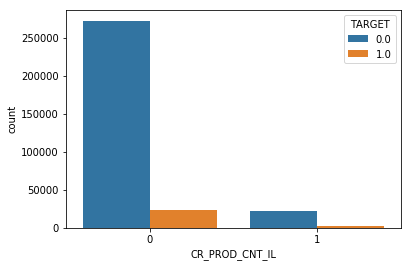

In [24]:
train["CR_PROD_CNT_IL"] = np.where(train["CR_PROD_CNT_IL"]==0,0,1)
test["CR_PROD_CNT_IL"] = np.where(test["CR_PROD_CNT_IL"]==0,0,1)
sns.countplot(x="CR_PROD_CNT_IL", hue="TARGET", data=train)

AMOUNT_RUB_CLO_PRC

In [25]:
train["AMOUNT_RUB_CLO_PRC"].describe()

count    286213.000000
mean          0.044186
std           0.108817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.036884
max           1.000000
Name: AMOUNT_RUB_CLO_PRC, dtype: float64

In [26]:
print(train[train["TARGET"] == 1]["AMOUNT_RUB_CLO_PRC"].mean())
print(train[train["TARGET"] == 0]["AMOUNT_RUB_CLO_PRC"].mean())

0.028685308554002545
0.04560142199478207


/opt/anaconda/envs/bd9/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


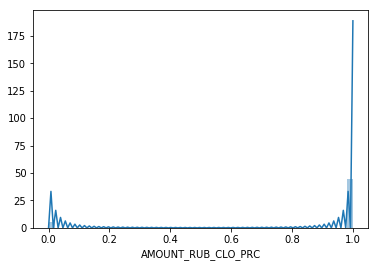

In [27]:
sns.distplot(train["AMOUNT_RUB_CLO_PRC"].notnull())

In [28]:
train["REST_DYNAMIC_CUR_1_3M"] = train["REST_DYNAMIC_CUR_3M"]/train["REST_DYNAMIC_CUR_1M"]
test["REST_DYNAMIC_CUR_1_3M"] = test["REST_DYNAMIC_CUR_3M"]/test["REST_DYNAMIC_CUR_1M"]

In [29]:
train["TURNOVER_DYNAMIC_CUR_1_3M"] = train["TURNOVER_DYNAMIC_CUR_3M"]/train["TURNOVER_DYNAMIC_CUR_1M"]
test["TURNOVER_DYNAMIC_CUR_1_3M"] = test["TURNOVER_DYNAMIC_CUR_3M"]/test["TURNOVER_DYNAMIC_CUR_1M"]

In [30]:
train["REST_AVG_CUR_2"] = train["REST_AVG_CUR"]*train["REST_AVG_CUR"]
test["REST_AVG_CUR_2"] = test["REST_AVG_CUR"]*test["REST_AVG_CUR"]

PRC_ACCEPTS_A_EMAIL_LINK

### Modeling with lightgbm

In [ ]:
train.columns

In [ ]:
test.shape

In [31]:
X = train.drop("TARGET", axis=1)
Y = train["TARGET"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
print("Train: ",X_train.shape)
print("Test: ",X_test.shape)

Train:  (214911, 51)
Test:  (105852, 51)


In [33]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

In [57]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)
params = {}
params['learning_rate'] = 0.1
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'auc'
params['sub_feature'] = 0.5
params['num_leaves'] = 15
params['min_data'] = 70
params['max_depth'] = 15
clf = lgb.train(params, d_train, 100)

In [58]:
cv_results = lgb.cv(
        params,
        d_train,
        num_boost_round=100,
        nfold=5,
        metrics='auc',
        early_stopping_rounds=10
        )

In [59]:
cv_results["auc-mean"]

[0.7648393730611106,
 0.7797527238002673,
 0.7923410506779327,
 0.7966545323039622,
 0.7991700399698942,
 0.8005170840935882,
 0.8046751236536576,
 0.8052078865391996,
 0.8082120134065537,
 0.8089690348909508,
 0.8094204104782451,
 0.8108729640933339,
 0.8114522131762845,
 0.8139464848843335,
 0.8149360601721117,
 0.8152370826575155,
 0.8160955815060044,
 0.8168921703727718,
 0.8174074120846267,
 0.8187439864636428,
 0.8193687217929082,
 0.8198471655613634,
 0.8205206816735714,
 0.8210591907090444,
 0.821504335641519,
 0.8222178392747337,
 0.822758531655819,
 0.8233658816842923,
 0.8237778615580179,
 0.8243681229426985,
 0.8247303718776591,
 0.8253038138024111,
 0.8257235630605617,
 0.8260146079390088,
 0.8266053821777349,
 0.8270663896730271,
 0.8273097766112375,
 0.8278081019756722,
 0.8281825161430845,
 0.828582675983007,
 0.8287605784157748,
 0.8291664543121877,
 0.8294461331541101,
 0.8297468955070147,
 0.8301847431471436,
 0.8303990652039829,
 0.8306882471682335,
 0.8309034446714

In [60]:
predictions = clf.predict(X_test)
print(roc_auc_score(y_test,predictions))

0.8423972673417168


In [61]:
test.head()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,TURNOVER_DYNAMIC_IL_1M,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,TRANS_COUNT_NAS_PRC,CR_PROD_CNT_TOVR,CR_PROD_CNT_PIL,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CR_PROD_CNT_CC,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,CR_PROD_CNT_CCFP,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,REST_DYNAMIC_PAYM_1M,TURNOVER_DYNAMIC_CUR_3M,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,PACK_cat_105,PACK_cat_K01,PACK_cat_O01,PACK_cat_other,REST_DYNAMIC_CUR_1_3M,TURNOVER_DYNAMIC_CUR_1_3M,REST_AVG_CUR_2
0,519130,0,0.000000,0.0,0.000000,0.0,1.0,0,13916.819100,0.000000,0.000000,0.000000,0,0,0.0,1.000000,1.000000,0.000,20.0,0,0.0,0.0,0,0.479789,0.000000,0.0,1.000000,0.640112,0.000000,0.0,1.000000,0.0,1.000000,0.000000,1.000000,0.571399,0.000000,0.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0,1,0,0,2.084249,1.562226,1.936779e+08
1,234045,0,0.013322,0.0,0.047857,0.0,0.0,0,86440.624233,0.012061,0.109589,0.191781,0,0,0.0,0.136986,0.607640,0.000,29.0,0,0.0,0.0,0,0.075561,0.000000,0.0,0.330424,0.147249,0.000000,0.0,0.500000,0.0,0.616595,0.000000,0.556152,3.281195,0.000000,0.000000,0.522863,0.547945,0.0,0.0,0.0,0.0,0,0,0,0,4.372968,3.776946,7.471982e+09
2,401256,0,0.011870,0.0,0.014813,0.0,0.0,0,84684.829033,0.013152,0.230769,0.076923,0,0,0.0,0.230769,0.943369,0.000,43.0,0,0.0,0.0,0,0.476564,0.000000,0.0,0.758666,0.101526,0.000000,0.0,0.666667,0.0,0.659953,0.000000,0.741669,3.434413,0.000000,0.000000,0.679210,0.923077,0.0,0.0,0.0,0.0,0,0,0,1,1.591947,7.305173,7.171520e+09
3,551070,0,0.000000,0.0,0.000000,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0.020619,0.527584,74253.725,29.0,0,0.0,0.0,0,0.000000,122612.550283,0.0,0.000000,0.000000,0.589685,0.0,1.000000,0.0,1.000000,0.217298,0.000000,6.861721,0.653115,0.248998,0.719928,0.536082,0.0,0.0,0.0,0.0,1,0,0,0,inf,inf,0.000000e+00
4,367285,0,0.044144,0.0,0.085241,0.0,0.0,0,14842.437900,0.023992,0.190986,0.051180,0,0,0.0,0.370521,0.597614,0.000,48.0,0,0.0,0.0,0,0.146151,0.000000,0.0,0.473150,0.000000,0.000000,0.0,0.628775,0.0,0.617866,0.000000,0.000000,3.179037,0.000000,0.000000,0.581817,0.597192,0.0,0.0,0.0,0.0,0,1,0,0,3.237413,inf,2.202980e+08


In [62]:
test = test.fillna(X_train.mean())
print(test.shape)
test.head()

(44399, 51)


,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,TURNOVER_DYNAMIC_IL_1M,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,TRANS_COUNT_NAS_PRC,CR_PROD_CNT_TOVR,CR_PROD_CNT_PIL,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CR_PROD_CNT_CC,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,CR_PROD_CNT_CCFP,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,REST_DYNAMIC_PAYM_1M,TURNOVER_DYNAMIC_CUR_3M,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,PACK_cat_105,PACK_cat_K01,PACK_cat_O01,PACK_cat_other,REST_DYNAMIC_CUR_1_3M,TURNOVER_DYNAMIC_CUR_1_3M,REST_AVG_CUR_2
0,519130,0,0.000000,0.0,0.000000,0.0,1.0,0,13916.819100,0.000000,0.000000,0.000000,0,0,0.0,1.000000,1.000000,0.000,20.0,0,0.0,0.0,0,0.479789,0.000000,0.0,1.000000,0.640112,0.000000,0.0,1.000000,0.0,1.000000,0.000000,1.000000,0.571399,0.000000,0.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0,1,0,0,2.084249,1.562226,1.936779e+08
1,234045,0,0.013322,0.0,0.047857,0.0,0.0,0,86440.624233,0.012061,0.109589,0.191781,0,0,0.0,0.136986,0.607640,0.000,29.0,0,0.0,0.0,0,0.075561,0.000000,0.0,0.330424,0.147249,0.000000,0.0,0.500000,0.0,0.616595,0.000000,0.556152,3.281195,0.000000,0.000000,0.522863,0.547945,0.0,0.0,0.0,0.0,0,0,0,0,4.372968,3.776946,7.471982e+09
2,401256,0,0.011870,0.0,0.014813,0.0,0.0,0,84684.829033,0.013152,0.230769,0.076923,0,0,0.0,0.230769,0.943369,0.000,43.0,0,0.0,0.0,0,0.476564,0.000000,0.0,0.758666,0.101526,0.000000,0.0,0.666667,0.0,0.659953,0.000000,0.741669,3.434413,0.000000,0.000000,0.679210,0.923077,0.0,0.0,0.0,0.0,0,0,0,1,1.591947,7.305173,7.171520e+09
3,551070,0,0.000000,0.0,0.000000,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0.020619,0.527584,74253.725,29.0,0,0.0,0.0,0,0.000000,122612.550283,0.0,0.000000,0.000000,0.589685,0.0,1.000000,0.0,1.000000,0.217298,0.000000,6.861721,0.653115,0.248998,0.719928,0.536082,0.0,0.0,0.0,0.0,1,0,0,0,inf,inf,0.000000e+00
4,367285,0,0.044144,0.0,0.085241,0.0,0.0,0,14842.437900,0.023992,0.190986,0.051180,0,0,0.0,0.370521,0.597614,0.000,48.0,0,0.0,0.0,0,0.146151,0.000000,0.0,0.473150,0.000000,0.000000,0.0,0.628775,0.0,0.617866,0.000000,0.000000,3.179037,0.000000,0.000000,0.581817,0.597192,0.0,0.0,0.0,0.0,0,1,0,0,3.237413,inf,2.202980e+08


In [63]:
predictions = clf.predict(test)
answer = pd.DataFrame(predictions)
answer.columns = ["target"]
print(answer.shape)
answer.head()

(44399, 1)


,target
0,0.204494
1,0.010178
2,0.007067
3,0.019400
4,0.005767


In [64]:
answer["ID"] = test["ID"]
answer[["ID","target"]].head()

,ID,target
0,519130,0.204494
1,234045,0.010178
2,401256,0.007067
3,551070,0.019400
4,367285,0.005767


In [65]:
answer[["ID","target"]].to_csv("../lab04.csv", sep="\t", index_label=False, index=False)
answer[["ID","target"]].to_csv("../lab04s.csv", sep="\t", index_label=False, index=False)

In [66]:
test["ID"].head()

0    519130
1    234045
2    401256
3    551070
4    367285
Name: ID, dtype: int64

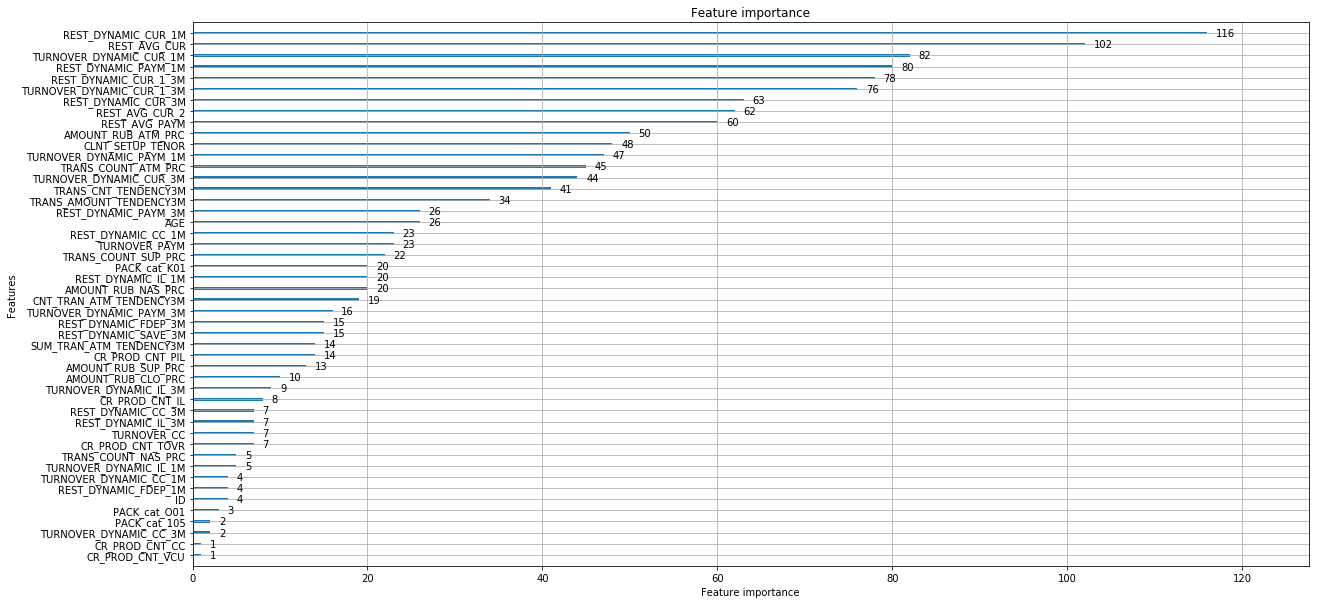

In [67]:
ax = lgb.plot_importance(clf,max_num_features=50)
fig = ax.figure
fig.set_size_inches(20, 10)